In [1]:
from imports_for_ML import *
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img, img_to_array

from keras.callbacks import EarlyStopping

import os
import seaborn as sns
import random

%matplotlib inline

In [2]:
def check_net_correctness(check_idx, test_sample, true_labels):
    predictions = model.predict(test_sample)
    plt.imshow(test_sample[check_idx] / 255)

    text = 'The network is: {:.2f}% sure it is a dog,\nbut really it is a {}, so the network {}'
    correct_response = true_labels[check_idx]
    it_is_really = ['cat', 'dog'][correct_response]
    net_claims = predictions[check_idx, 0]
    is_net_correct = np.abs(net_claims - correct_response) < 0.5

    plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
    plt.axis('off')
    
#checking the correctness of the network on a single object from sample dataset

In [3]:
def display_training_curves(history):
    fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(7,10))
    ax[0].plot(history.history['accuracy'], label='accuracy')
    ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
    ax[0].legend()
    ax[0].title.set_text('Training and Validation Accuracy')
    #ax[0].set_xlabel('number of epochs')
    
    ax[1].plot(history.history['val_loss'], label='validation loss')
    ax[1].scatter(y=history.history['loss'],x=range(0,len(history.history['loss'])), label='traingin loss')
    ax[1].title.set_text('Training and Validation loss')
    ax[1].legend()
    ax[1].set_xlabel('number of epochs')
    
#printing the graphs of 1. Training and validation accuracy; 2. Training and validation loss

In [4]:
def load_images(img_dir, n_images=1000, resize=(50, 50)):
    '''
    Load images of cats and dogs and organize into sklearn-like format.
    '''
    try:
        from keras.preprocessing.image import load_img, img_to_array
    except:
        from tensorflow.keras.preprocessing.image import load_img, img_to_array

    images = os.listdir(img_dir)
    is_dog = np.array(['dog' in img for img in images])
    n_per_categ = n_images // 2

    n_stars = 0
    imgs, y = list(), list()
    for flt_idx, flt in enumerate([~is_dog, is_dog]):
        sel_images = np.array(images)[flt]
        np.random.shuffle(sel_images)
        for idx in range(n_per_categ):
            full_img_path = os.path.join(img_dir, sel_images[idx])
            imgs.append(img_to_array(load_img(full_img_path,
                                              target_size=resize)))
            y.append(flt_idx)

            # progressbar
            if idx % 20 == 0:
                print('*', end='')
                n_stars += 1
            if n_stars == 50:
                n_stars = 0
                print('')

    y = np.array(y)
    imgs = np.stack(imgs, axis=0)
    return imgs, y

In [5]:
img_dir = r'train'
images = os.listdir(img_dir)
images[:3]

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg']

In [6]:
full_images = [os.path.join(img_dir, img) for img in images]

In [7]:
full_images[:3]

['train/dog.8011.jpg', 'train/cat.5077.jpg', 'train/dog.7322.jpg']

In [36]:
X, y = load_images(img_dir, n_images=25000, resize=(64, 64))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [39]:
X_test[1].shape

(64, 64, 3)

In [40]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))

model.add(Flatten(input_shape=(5,5,32)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization_32 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
batch_normalization_33 (Batc (None, 60, 60, 16)        64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 20, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 18, 18, 64)       

In [43]:
early_stop = EarlyStopping(patience=3, verbose=0, min_delta=0.0001,restore_best_weights=True)

In [44]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.04, callbacks=[early_stop])

Epoch 1/20
675/675 [==============================] - 89s 131ms/step - loss: 0.8385 - accuracy: 0.5486 - val_loss: 0.6306 - val_accuracy: 0.6467
Epoch 2/20
675/675 [==============================] - 94s 139ms/step - loss: 0.6260 - accuracy: 0.6539 - val_loss: 0.6125 - val_accuracy: 0.6778
Epoch 3/20
675/675 [==============================] - 100s 148ms/step - loss: 0.5345 - accuracy: 0.7329 - val_loss: 0.6693 - val_accuracy: 0.6533
Epoch 4/20
675/675 [==============================] - 100s 149ms/step - loss: 0.4728 - accuracy: 0.7760 - val_loss: 0.4075 - val_accuracy: 0.8133
Epoch 5/20
675/675 [==============================] - 91s 134ms/step - loss: 0.4274 - accuracy: 0.8063 - val_loss: 0.5740 - val_accuracy: 0.7267
Epoch 6/20
675/675 [==============================] - 89s 132ms/step - loss: 0.3997 - accuracy: 0.8236 - val_loss: 0.3955 - val_accuracy: 0.8067
Epoch 7/20
675/675 [==============================] - 92s 136ms/step - loss: 0.3651 - accuracy: 0.8385 - val_loss: 0.3732 - val_

In [45]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
704/704 [==============================] - 19s 27ms/step - loss: 0.1920 - accuracy: 0.9247
0.9246666431427002

Accuracy on the test data:
79/79 [==============================] - 2s 28ms/step - loss: 0.2355 - accuracy: 0.9048
0.9047999978065491


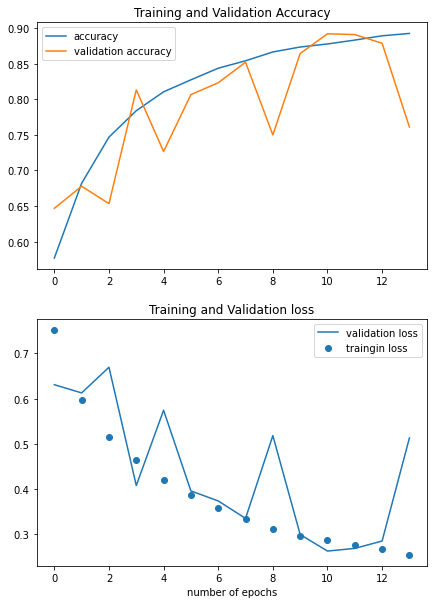

In [46]:
display_training_curves(history)

<ipython-input-2-70072b66af22>:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))


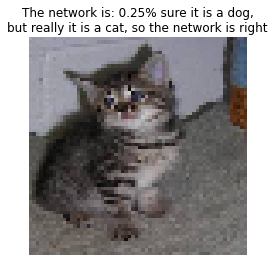

In [47]:
check_net_correctness(random.randint(0,len(y_test)), X_test, y_test)

In [55]:
model_predictions = model.predict_classes(X_test)
model_predictions = model_predictions.reshape(len(X_test))

wrong_preds = np.array(np.where(~(model_predictions==y_test)))[0]
corr_preds = np.array(np.where((model_predictions==y_test)))[0]

preds = model.predict(X_test)

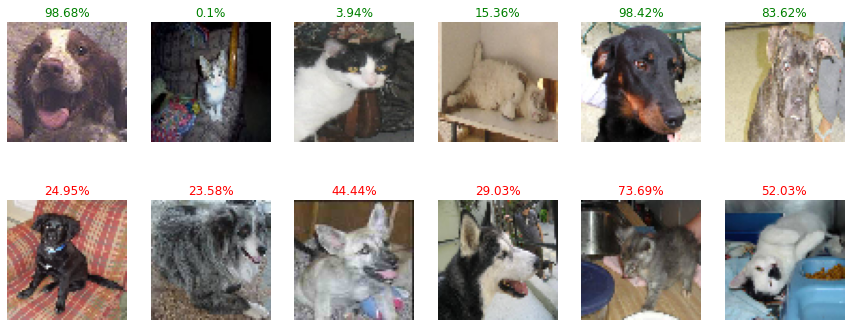

In [56]:
random_wrong = random.sample(list(wrong_preds), 6)
random_corr = random.sample(list(corr_preds), 6)

columns = 6
rows = 2

fig, ax = plt.subplots(ncols=columns, nrows=rows, figsize=(15,6))

for  row, lst, color in zip(range(rows),[random_corr,random_wrong],['green','red']):
    for col,pic in zip(range(columns),lst):
        ax[row,col].imshow(X_test[pic] / 255)
        ax[row,col].title.set_text(f"{round(preds[pic,0]*100.,ndigits=2)}%")
        ax[row,col].title.set_color(color)
        ax[row,col].axis('off')

In [58]:
def predict_single_object(pth, model):
    item = img_to_array(load_img(pth, target_size=(64,64)))
    to_predict = np.expand_dims(item, axis=0)
    prediction = model.predict(to_predict)
    
    dog_or_cat = lambda x: "dog" if x > 0.5 else "cat"
    is_real = dog_or_cat(prediction[0][0])
    
    if is_real == "dog":
        real_pred = prediction[0][0]
    else:
        real_pred = 1-prediction[0][0]
    
    text = 'The network is: {}% sure it is a {}'
    plt.imshow(item / 255)
    plt.title(text.format(round(real_pred*100.,ndigits=2), is_real))
    plt.axis('off')
    
#predicting the value of a single object, in this case a photo of a given path

In [59]:
def predict_three_objects(list_of_paths, model):
    """
    Predicts and displays three random photos from the folder of path (given as an argument) with the use of Model (defined as 2nd argument)
    """
    
    list_of_paths = random.sample(list_of_paths, 3)
    print(list_of_paths)
    rows=1
    columns=3
    
    fig, ax = plt.subplots(ncols=columns, nrows=int(rows), figsize=(15,5))
    for col, item in zip(range(0,columns),list_of_paths):
        raw = img_to_array(load_img(item, target_size=(64,64)))
        to_predict = np.expand_dims(raw, axis=0)
        prediction = model.predict(to_predict)
        
        dog_or_cat = lambda x: "dog" if x > 0.5 else "cat"
        is_real = dog_or_cat(prediction[0][0])
        
        if is_real == "dog":
            real_pred = prediction[0][0]
        else:
            real_pred = 1-prediction[0][0]
            
        text = 'The network is: {}% sure it is a {}'
        
        ax[col].imshow(raw / 255)
        ax[col].title.set_text(text.format(round(real_pred*100.,ndigits=2), is_real))
        ax[col].axis('off')

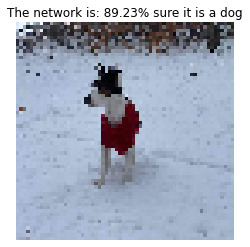

In [60]:
path = r'test_dogs/babel.jpg'
predict_single_object(path,model)

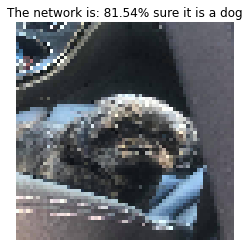

In [61]:
path = r'test_dogs/pikus.jpg'
predict_single_object(path,model)

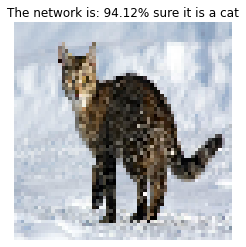

In [62]:
path = r'test_dogs/cat.jpg'
predict_single_object(path,model)

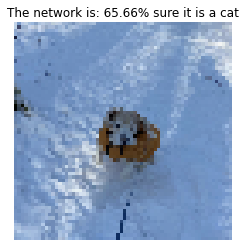

In [63]:
path = r'test_dogs/pies_kamila.jpg'
predict_single_object(path,model)
#it's a dog <<sad pepe>>

In [66]:
img_test = r'test_dogs'
images_test = os.listdir(img_test)
images_test = images_test[1:]

In [65]:
full_images_test = [os.path.join(img_test, img) for img in images_test]
full_images_test

['test_dogs/3408.jpg',
 'test_dogs/dog-puppy-on-garden-royalty-free-image-1586966191.jpg',
 'test_dogs/cat.jpg',
 'test_dogs/pikus.jpg',
 'test_dogs/babel.jpg',
 'test_dogs/pies_kamila.jpg']

['test_dogs/cat.jpg', 'test_dogs/babel.jpg', 'test_dogs/dog-puppy-on-garden-royalty-free-image-1586966191.jpg']


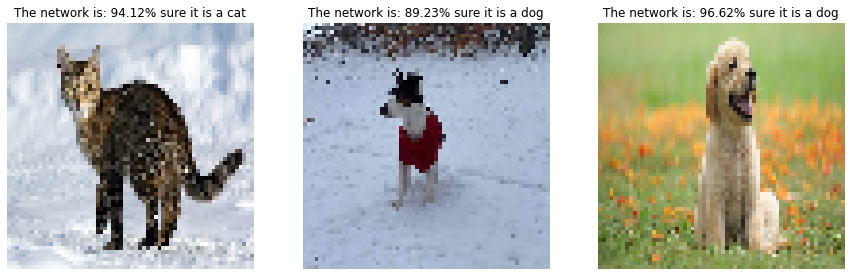

In [68]:
predict_three_objects(full_images_test,model)